# Dicom to image conversion
In this notebook we will show how we convert dicom files to images.

In [1]:
import pydicom
from matplotlib import pyplot as plt
import os
import numpy as np

First we read the dicom image stored in the folder and we visualize it

c:\Users\halakd\AppData\Local\Programs\Python\Python38\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


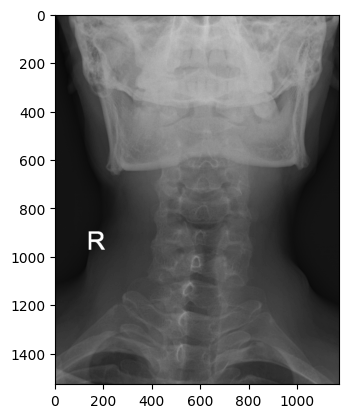

In [2]:
dir = 'dicom_image'
files = os.listdir(dir)

# read the dicom file
ds = pydicom.dcmread(os.path.join(dir, files[0]))
plt.imshow(ds.pixel_array, cmap='gray')
plt.show()

Now, we convert it to a numpy array so we can add noise to it and feed it to a network

In [3]:
# convert to numpy array
data= ds.pixel_array 
data = np.array(data)
print(max(data.flatten()), min(data.flatten()))
print(data.shape)

4095 0
(1527, 1172)


# Add noise to the image
Now that the image is a numpy array we can process it and add noise to it.

First we normalize the image to have values between 0 and 1 and downscale the images

In [4]:
# normalize the data
data = data / np.max(data)

# downsample the data
data = data[::4, ::4]

print(max(data.flatten()), min(data.flatten()))
print(data.shape)

1.0 0.0
(382, 293)


Now we can add the noise and visualzie the image again

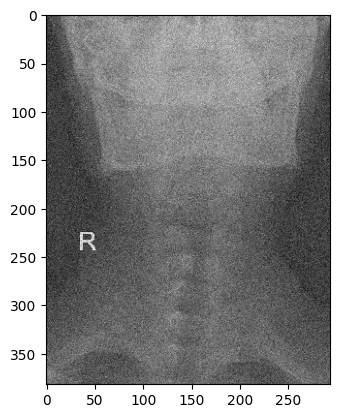

In [5]:
# add noise
data = data + np.random.normal(0, 0.1, data.shape)

# plot the image
plt.imshow(data, cmap='gray')
plt.show()

# Converting multiple images

In [6]:
SOURCE_FOLDER = r'test_set\dicom'
TARGET_FOLDER = r'test_set\image'

In [7]:
for file in os.listdir(SOURCE_FOLDER):
    ds = pydicom.dcmread(os.path.join(SOURCE_FOLDER, file))
    data = ds.pixel_array
    data = data[::4, ::4]
    plt.imsave(os.path.join(TARGET_FOLDER, file.split('.')[0] + '.png'), data, cmap='gray')

c:\Users\halakd\AppData\Local\Programs\Python\Python38\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(
